In [1]:
import sys
sys.path.append("/home/ly/workspace/mmsa")
seed = 1000003
import numpy as np
import torch
from torch import nn
from torch import optim

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
from models.mvsa_text_cnn import *
from utils.train import *
from typing import *
from collections import Counter

from utils.load_mvsa import *
from utils.dataset import *
from utils.train import *
config

{'use_cuda': True,
 'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'filter_size': (2, 3, 4, 5),
 'filter_num': 50,
 'max_tokens': 512,
 'bias_init': 1.0,
 'use_img': True,
 'img_input_size': 4096,
 'img_output_size': 100,
 'img_num': 1,
 'output_size': 5,
 'dropout': 0.5}

In [2]:
config["use_img"] = False
config

{'use_cuda': True,
 'task': 'CLS',
 'embedding_dim': 100,
 'embedding': None,
 'freeze_embedding': True,
 'filter_size': (2, 3, 4, 5),
 'filter_num': 50,
 'max_tokens': 512,
 'bias_init': 1.0,
 'use_img': False,
 'img_input_size': 4096,
 'img_output_size': 100,
 'img_num': 1,
 'output_size': 5,
 'dropout': 0.5}

In [4]:
%%time
train_set, valid_set, test_set= load_glove_data(config)
batch_size = 64
workers = 4
train_loader, valid_loader, test_loader = get_loader(batch_size, workers, get_collate_fn(config), train_set, valid_set, test_set)
model = Model(config).cuda()
loss = nn.CrossEntropyLoss()

print(get_parameter_number(model), loss)

_interval = 5
lr = 1e-3
epoches = 50
stoping_step = 10
optimizer = get_regal_optimizer(model, optim.AdamW, lr)

viz = get_Visdom()
batch_loss_drawer = VisdomScalar(viz, f"batch_loss interval:{_interval}")
epoch_loss_drawer = VisdomScalar(viz, f"Train and valid loss", 2)
acc_drawer = VisdomScalar(viz, "Train and valid accuracy", 2)
text_writer = VisdomTextWriter(viz, "Training")

batch_loss = []
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

res, model = train_visdom_v2(model, optimizer, loss, viz, train_loader,
                          valid_loader, epoches, batch_loss, batch_loss_drawer,
                          train_loss, valid_loss, epoch_loss_drawer,
                          train_acc, valid_acc, acc_drawer, text_writer,
                         _interval=_interval, early_stop=stoping_step)

Setting up a new session...


{'Total': 1329703, 'Trainable': 70803} CrossEntropyLoss()


No 1 epoch: 119it [00:46,  2.57it/s]
No 2 epoch: 119it [00:01, 63.58it/s]
No 3 epoch: 119it [00:02, 58.71it/s]
No 4 epoch: 119it [00:02, 58.94it/s]
No 5 epoch: 119it [00:02, 55.47it/s]
No 6 epoch: 119it [00:02, 58.28it/s]
No 7 epoch: 119it [00:01, 60.19it/s]
No 8 epoch: 119it [00:02, 59.18it/s]
No 9 epoch: 119it [00:01, 60.46it/s]
No 10 epoch: 119it [00:01, 60.70it/s]
No 11 epoch: 119it [00:01, 59.90it/s]
No 12 epoch: 119it [00:02, 58.75it/s]
No 13 epoch: 119it [00:02, 58.95it/s]


CPU times: user 23.6 s, sys: 5.38 s, total: 29 s
Wall time: 1min 38s


In [5]:
eval_model(model, test_loader, loss)

((0.6674593737613952, 0.6377738921294117), 0.7210260955435956)

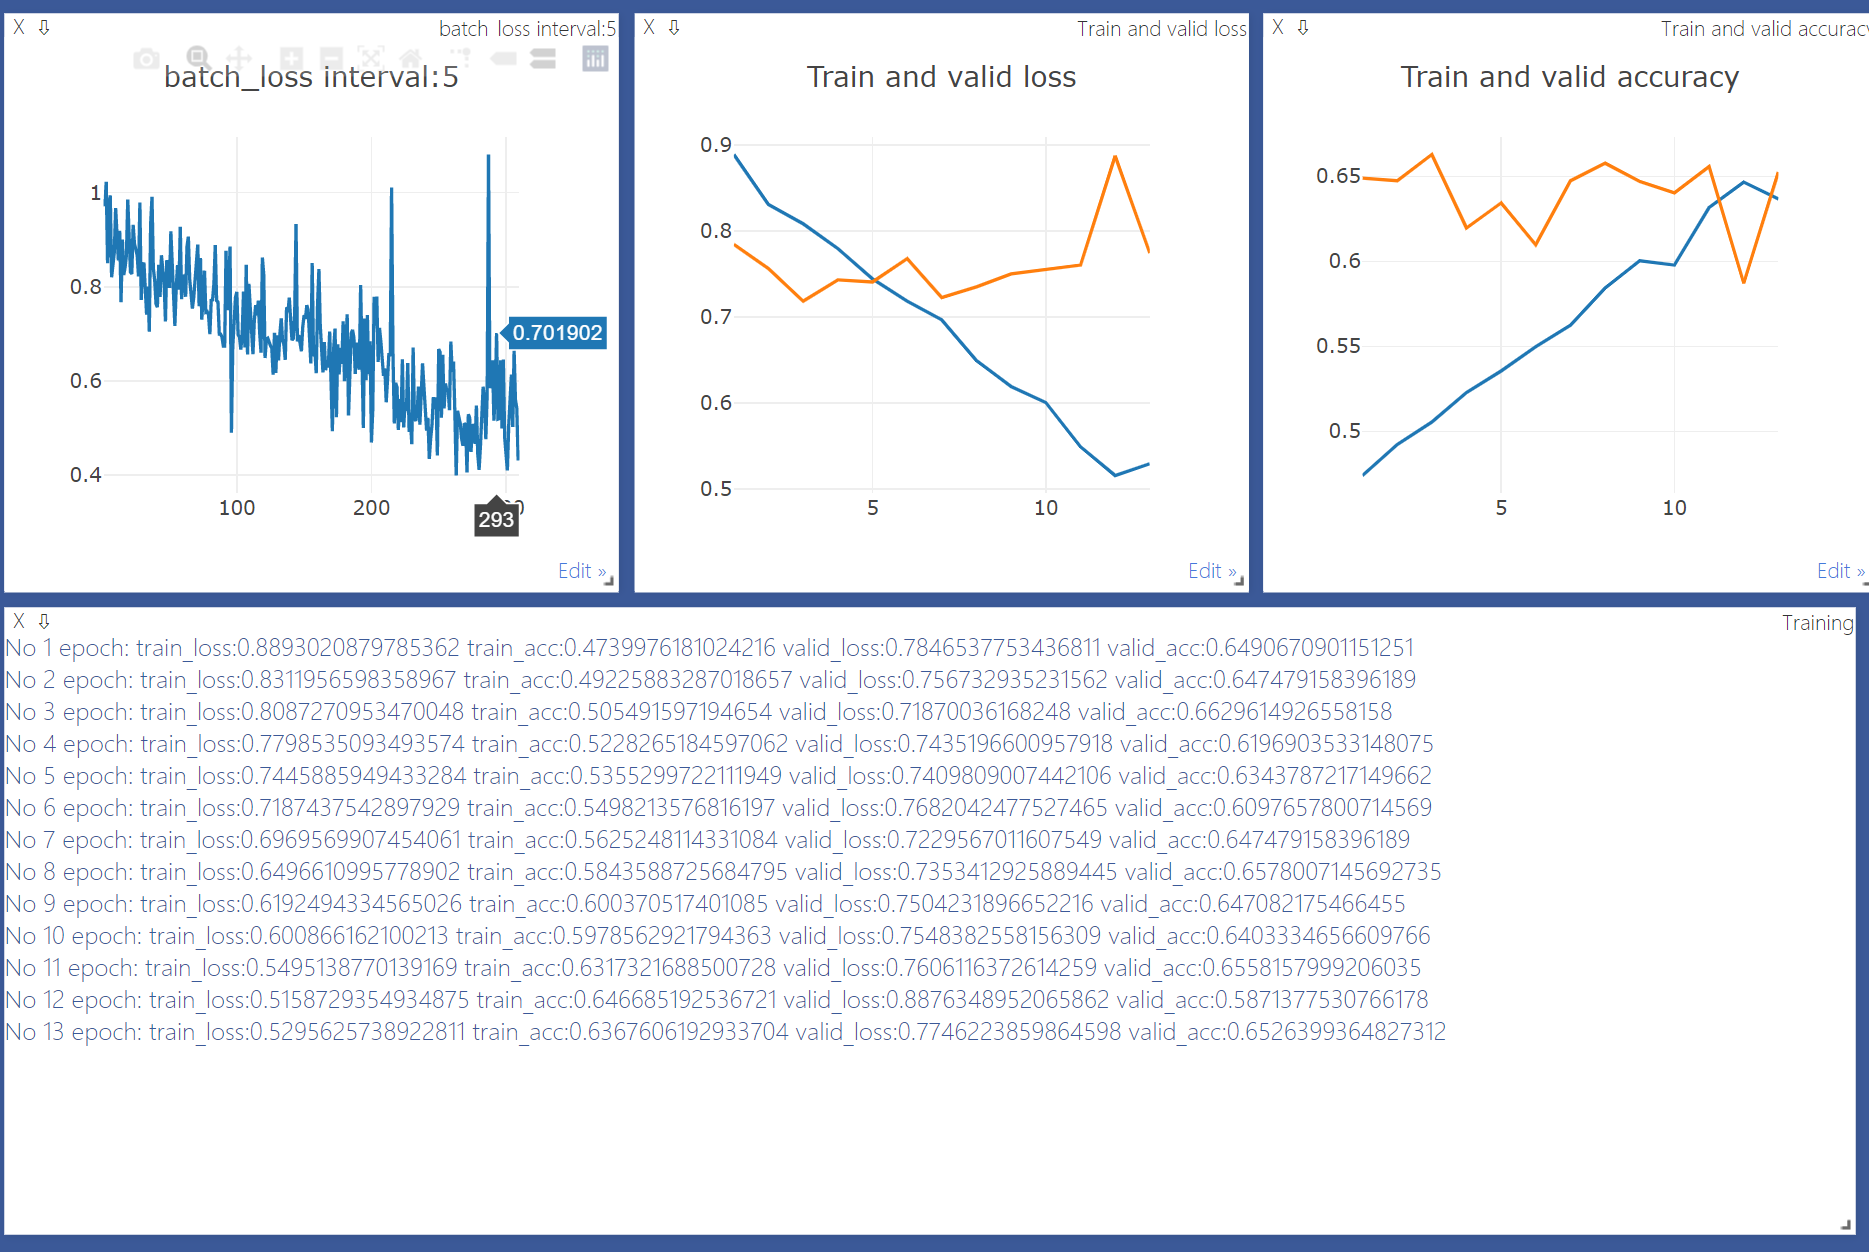